In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/machine_learning_cl

/content/drive/My Drive/machine_learning_cl


In [13]:
import csv

x_data = []
y_data = []
z_data = []
h_data = []


with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
      x_data.append(float(i[0]))
      y_data.append(float(i[1]))
      z_data.append(float(i[2]))
      h_data.append(float(i[3]))
      #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
      ct += 1


print(x_data)
print(type(x_data))

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        
        #print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1


[0.27354771453665605, 5.403327323126673, 0.029941312523676267, 3.047974457680872, 1.3020743188547064, 0.48067768765626884, 1.6315020736136816, 6.373997103111523, 7.003140610383589, 11.816393974825985, 6.927811569347049, 14.655972384212781, 11.937986482955866, 15.549856868263298, 14.94482857356449, 14.572378343253442, 18.807552360264513, 18.124161776842904, 19.959199906946083, 17.337795123251517, 24.06556718385143, 22.550771187836386, 18.522084906154614, 18.278899023992395, 19.190793624780877, 29.42094137372996, 23.59676453287394, 26.505968577473542, 26.6409882665873, 25.077307266581673, 29.596500830146383, 26.804197216511835, 34.49645875291463, 30.33790473087235, 31.527467957132796, 38.39826504387088, 38.05069893151431, 40.79809095737625, 40.0879154543992, 40.47827472745201, 43.028319985344204, 41.222758489625484, 40.08651031142885, 41.61507733787956, 46.82551500760967, 49.39562792769493, 44.3053808029509, 45.02243552837576, 48.77793958942533, 46.84543760745903, 47.157046026852214, 53.

In [0]:
import numpy as np
import random 
import matplotlib.pyplot as plt

#Hypothesis & Object function


Hypothesis (Linear Model)

$$f_\theta(x,y,z)=\theta_0+\theta_1x + \theta_2y + \theta_3y, \\
where\\ \theta = (\theta_0, \theta_1, \theta_2, \theta_3) \in R $$

Objective funtion(cost function)
$$
J(\theta)=\frac{1}{2m} \sum_{i=1}^m (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)})^2
$$

In [0]:
x = np.array(x_data)
y = np.array(y_data)
z = np.array(z_data)
H = np.array(h_data)


## hypothesis
def h(th0, th1, th2, th3):
    hypo = th0 + th1*(x) + th2*(y) + th3*(z)
    return hypo

## cost function
def J(th0, th1, th2, th3):
    cost = (1/(2*len(x)))*np.sum((h(th0, th1, th2, th3)-H)**2)
    return cost


# GD Algorithm for linear regression
$$
\theta_0^{(t+1)} : = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)})
$$
$$
\theta_1^{(t+1)} : = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)}) x^{(i)}
$$
$$
\theta_2^{(t+1)} : = \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)}) y^{(i)}
$$
$$
\theta_3^{(t+1)} : = \theta_3^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\theta_0+\theta_1x + \theta_2y + \theta_3z−h^{(i)}) z^{(i)}
$$

In [34]:
# list for graph 
list_th0 = []
list_th1 = []
list_th2 = []
list_th3 = []
list_J = []

## settings for GD algorithm
itr = np.arange(20000)+1
th0 = -1
th1 = -1  
th2 = -1
th3 = -1
a = 0.00002

### GD Algorithm - PATH
## performing gd algorithm for linear regression 

for iteration in np.ndenumerate(itr):

    cost = J(th0, th1, th2, th3)
    list_th0.append(th0)
    list_th1.append(th1)
    list_th2.append(th2)
    list_th3.append(th3)
    list_J.append(cost)

    temp0 = th0 - a *(1/len(x_data))*np.sum((h(th0, th1, th2, th3)-H))
    temp1 = th1 - a *(1/len(x_data))*np.sum((h(th0, th1, th2, th3)-H)*(x))
    temp2 = th2 - a *(1/len(x_data))*np.sum((h(th0, th1, th2, th3)-H)*(y))
    temp3 = th3 - a *(1/len(x_data))*np.sum((h(th0, th1, th2, th3)-H)*(z))

    th0 = temp0
    th1 = temp1
    th2 = temp2
    th3 = temp3

    print("iteration : ", iteration)
    print("cost : ", cost)
    print("theta0 : ", th0, "theta1 : ", th1, "theta2 : ", 
          th2, "theta3 : ", th3 )


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
theta0 :  -1.0143314410579758 theta1 :  0.7926994767861051 theta2 :  -1.794652599849218 theta3 :  4.007521058144162
iteration :  ((18334,), 18335)
cost :  103.45779551494527
theta0 :  -1.0143323287092754 theta1 :  0.7926998092984975 theta2 :  -1.794652904040673 theta3 :  4.007521033901379
iteration :  ((18335,), 18336)
cost :  103.45779546536697
theta0 :  -1.0143332163548906 theta1 :  0.7927001416789766 theta2 :  -1.79465320811061 theta3 :  4.0075210096691105
iteration :  ((18336,), 18337)
cost :  103.45779541579726
theta0 :  -1.014334103994822 theta1 :  0.7927004739275936 theta2 :  -1.7946535120590776 theta3 :  4.007520985447351
iteration :  ((18337,), 18338)
cost :  103.45779536623613
theta0 :  -1.01433499162907 theta1 :  0.7927008060444014 theta2 :  -1.7946538158861223 theta3 :  4.007520961236097
iteration :  ((18338,), 18339)
cost :  103.4577953166837
theta0 :  -1.0143358792576354 theta1 :  0.7927011380294503 theta2 :  -1.794654119591793 theta3 :

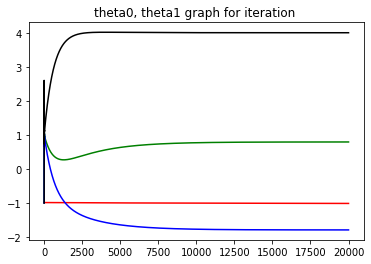

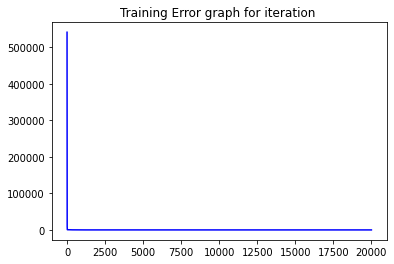

In [36]:

#theta0, theta1, theta2, theta3
plt.title("theta0, theta1, theta2, theta3 graph for iteration ")
plt.plot(itr, np.array(list_th0), color = 'red')
plt.plot(itr, np.array(list_th1), color = 'green')
plt.plot(itr, np.array(list_th2), color = 'blue')
plt.plot(itr, np.array(list_th3), color = 'black')
plt.show()


#J(th0, th1, th2, th3 )
plt.title("Training Error graph for iteration ")
plt.plot(itr, np.array(list_J), color = 'blue' )
plt.show()